<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [32]:
X, y = load_breast_cancer(return_X_y=True)
print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)

Feature matrix shape: (569, 30)
Target vector shape: (569,)


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


In [34]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

d_model = DecisionTreeClassifier(max_depth=1,random_state=42)
d_model.fit(X_train, y_train)
y_pred = d_model.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.8951048951048951


 Building AdaBoost Model
Now we boost the weak learner using AdaBoost.

In [35]:
#adaboost model build :
base_learn_model = DecisionTreeClassifier(max_depth=1,random_state=42)
ada = AdaBoostClassifier(
    estimator=base_learn_model,
    n_estimators=20,
    learning_rate=0.1,
    random_state=42
    )

ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=20, random_state=42)

In [36]:
y_pred_ada = ada.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred_ada))

print("\nConfusion Matrix :")
print(confusion_matrix(y_test,y_pred_ada))


Accuracy : 0.965034965034965

Confusion Matrix :
[[51  3]
 [ 2 87]]


In [37]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



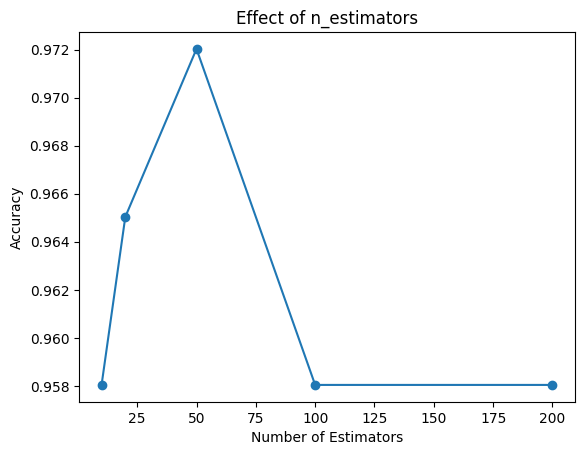

In [39]:
#Effect of Number of Estimators
estimators = [10,20,50,100,200]
accs = []
for n in estimators:
  model = AdaBoostClassifier(
      estimator = base_learn_model,
      n_estimators = n,
      learning_rate = 0.3,
      random_state = 42
  )
  model.fit(X_train,y_train)
  accs.append(accuracy_score(y_test,model.predict(X_test)))


plt.plot(estimators, accs, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.show()

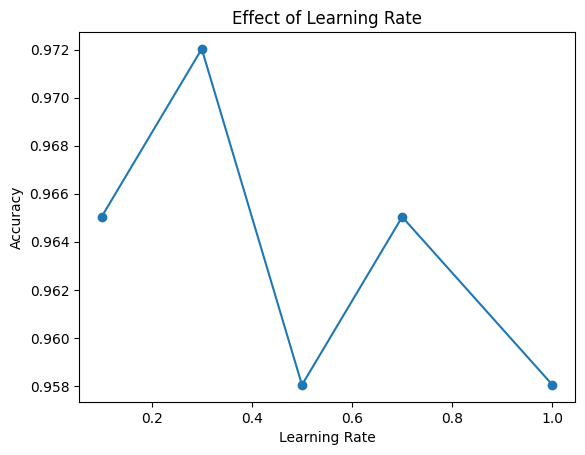

In [40]:
#Effect of Learning Rate
rates = [0.1, 0.3, 0.5, 0.7, 1.0]
accs_lr = []

for lr in rates:
  model = AdaBoostClassifier(
      estimator = base_learn_model,
      n_estimators = 50,
      learning_rate = lr,
      random_state = 42
  )
  model.fit(X_train,y_train)
  accs_lr.append(accuracy_score(y_test,model.predict(X_test)))


plt.plot(rates, accs_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'estimator__max_depth': [1, 2]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=AdaBoostClassifier(
        estimator=base_learn_model,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Run grid search
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("Best Parameters Found:")
print(grid.best_params_)
print("\nTest Accuracy (GridSearch AdaBoost):",
      accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters Found:
{'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 200}

Test Accuracy (GridSearch AdaBoost): 0.9790209790209791

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

